In [70]:
import pandas as pd


path = "/Users/kimberlybrooks/Desktop/PythonSemester2/all_participants_responses_stress_ema.csv"

In [71]:
stress = pd.read_csv(path, header =0)
stress.head()

,Participant ID,3/27/13,3/28/13,3/29/13,3/30/13,3/31/13,4/1/13,4/2/13,4/3/13,4/4/13,...,5/22/13,5/23/13,5/24/13,5/25/13,5/26/13,5/27/13,5/28/13,5/29/13,5/30/13,5/31/13
0,u44,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,...,3.0,3.0,3.0,NaN,NaN,4.0,NaN,NaN,NaN,1.0
1,u52,NaN,3.0,NaN,4.0,4.0,NaN,3.0,1.0,1.0,...,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,u25,2.0,3.0,3.0,2.0,NaN,3.0,3.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,u33,NaN,2.0,3.0,3.0,2.0,4.0,4.0,4.0,4.0,...,5.0,NaN,5.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN
4,u32,NaN,NaN,NaN,2.0,2.0,3.0,3.0,3.0,2.0,...,3.0,NaN,3.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN


# Daily Average Stress Level

In [65]:
date_columns = stress.columns[1:-1]  

# Step 3: Calculate average stress scores for each date
daily_averages = stress[date_columns].mean(axis=0)

# Step 4: Format the result
daily_averages_stress = daily_averages.reset_index()
daily_averages_stress.columns = ['Date', 'Average Stress Level']

# Display the result
print(daily_averages_stress)

       Date  Average Stress Level
0   3/27/13              2.500000
1   3/28/13              2.692308
2   3/29/13              3.032258
3   3/30/13              2.968750
4   3/31/13              2.607143
..      ...                   ...
60  5/26/13              3.000000
61  5/27/13              3.333333
62  5/28/13              4.200000
63  5/29/13              3.333333
64  5/30/13              1.000000

[65 rows x 2 columns]


# 3-Day Moving Average

In [66]:
daily_averages_stress["3-Day Moving Average"] = daily_averages_stress["Average Stress Level"].rolling(window=3, min_periods=1).mean()
#print("\nDataFrame with 3-Day Moving Average:\n", stress)
# Print just the Date and 3-Day Moving Average columns
print(daily_averages_stress[[ "Date","3-Day Moving Average"]])

       Date  3-Day Moving Average
0   3/27/13              2.500000
1   3/28/13              2.596154
2   3/29/13              2.741522
3   3/30/13              2.897772
4   3/31/13              2.869384
..      ...                   ...
60  5/26/13              3.209524
61  5/27/13              3.177778
62  5/28/13              3.511111
63  5/29/13              3.622222
64  5/30/13              2.844444

[65 rows x 2 columns]


# Plotting Trends

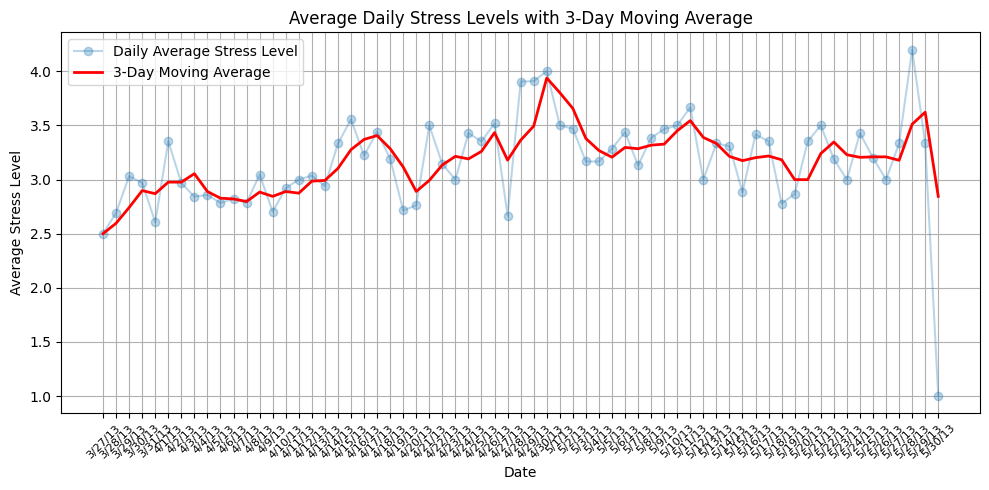

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(daily_averages_stress["Date"], daily_averages_stress["Average Stress Level"], label="Daily Average Stress Level", alpha=0.3, marker='o')
plt.plot(daily_averages_stress["Date"], daily_averages_stress["3-Day Moving Average"], label="3-Day Moving Average", color="red", linewidth=2)
plt.title("Average Daily Stress Levels with 3-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Average Stress Level")
plt.xticks(rotation=45, fontsize=8)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()